In [12]:
import pandas as pd
import numpy as ny
df=pd.read_excel(r"C:\Users\ADMIN DELL\Downloads\GLCM_extended_dataset_31-01-2023.xlsx")
df

,dissimilarity_0,dissimilarity_45,dissimilarity_90,dissimilarity_135,correlation_0,correlation_45,correlation_90,correlation_135,homogeneity_0,homogeneity_45,...,contrast_135,ASM_0,ASM_45,ASM_90,ASM_135,energy_0,energy_45,energy_90,energy_135,label
0,3.678102,6.468785,6.257544,6.491273,0.915573,0.018493,0.075505,0.021779,0.275196,0.202223,...,215.975507,0.003788,0.002980,0.003008,0.002954,0.061551,0.054587,0.054849,0.054355,2
1,4.396102,12.171347,13.892070,13.380560,0.959208,0.717372,0.645733,0.672928,0.354369,0.256529,...,1031.298494,0.003142,0.002297,0.002205,0.002255,0.056056,0.047928,0.046956,0.047492,2
2,3.334305,4.433875,4.334105,4.405370,0.787040,0.602248,0.619119,0.608713,0.280222,0.224585,...,39.051415,0.003641,0.002988,0.003047,0.003001,0.060337,0.054659,0.055196,0.054781,2
3,4.314475,5.777836,5.753193,5.763689,0.756037,0.628341,0.657986,0.623906,0.252098,0.192253,...,92.771572,0.002579,0.001978,0.001920,0.001995,0.050784,0.044475,0.043812,0.044663,2
4,5.857288,16.737261,17.875895,17.089386,0.952071,0.403892,0.267009,0.377622,0.201498,0.107262,...,1194.758798,0.001144,0.000805,0.000844,0.000806,0.033822,0.028372,0.029049,0.028390,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3248,23.481220,30.345158,30.512421,30.975999,0.535553,0.257932,0.237396,0.235897,0.079017,0.053209,...,2136.592483,0.000208,0.000178,0.000181,0.000175,0.014408,0.013337,0.013463,0.013237,2
3249,10.396915,12.462028,10.927123,13.065667,0.934857,0.922187,0.943582,0.912712,0.240068,0.229951,...,672.621270,0.006595,0.006695,0.007070,0.006693,0.081207,0.081823,0.084082,0.081810,2
3250,10.012814,12.596706,10.747684,12.538851,0.886700,0.827074,0.864881,0.827950,0.208428,0.204580,...,793.339597,0.004498,0.004434,0.004641,0.004474,0.067069,0.066591,0.068127,0.066891,2
3251,9.368169,11.030546,9.425825,10.964421,0.894877,0.866559,0.900581,0.867088,0.220739,0.212628,...,618.580131,0.004704,0.004694,0.004925,0.004767,0.068582,0.068510,0.070177,0.069047,2


In [13]:
import numpy as ny
class1_data=df['dissimilarity_90']
class2_data=df['correlation_0']
class1_mean=ny.mean(class1_data,axis=0)
class2_mean=ny.mean(class2_data,axis=0)
class1_variance=ny.var(class1_data, axis=0)
class2_variance=ny.var(class2_data, axis=0)
interclass_distance=ny.linalg.norm(class1_mean-class2_mean)
print("Mean of Class 1 = ",class1_mean)
print("Mean of Class 2 = ",class2_mean)
print("Intraclass Spread of Class 1 = ",class1_variance)
print("Intraclass Spread of Class 2 = ",class2_variance)
print("Interclass Distance:", interclass_distance)

Mean of Class 1 =  18.583229051724988
Mean of Class 2 =  0.7026949756996234
Intraclass Spread of Class 1 =  24.38252774742544
Intraclass Spread of Class 2 =  0.013621212054568944
Interclass Distance: 17.880534076025366


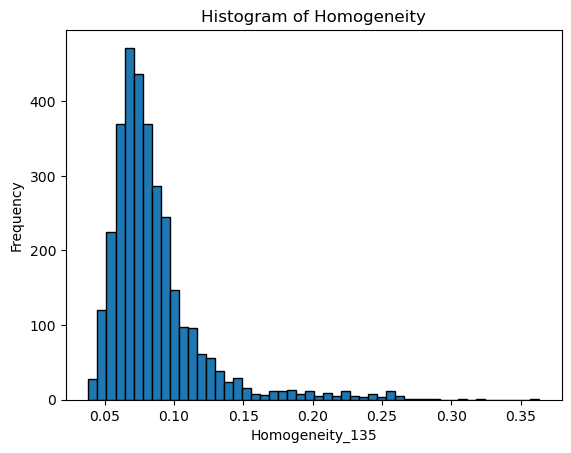

Mean of Homogeneity  = 0.08555122715502861
Variance of Homogeneity = 0.0011980354324140272


In [14]:
import matplotlib.pyplot as plt
homogeneity_135_data=df['homogeneity_135']
num_bins=50
plt.hist(homogeneity_135_data, bins=num_bins, edgecolor='k')
plt.xlabel('Homogeneity_135')
plt.ylabel('Frequency')
plt.title('Histogram of Homogeneity')
plt.show()
homogeneity_mean=ny.mean(homogeneity_135_data)
homogeneity_variance=ny.var(homogeneity_135_data)
print(f"Mean of Homogeneity  = {homogeneity_mean}")
print(f"Variance of Homogeneity = {homogeneity_variance}")

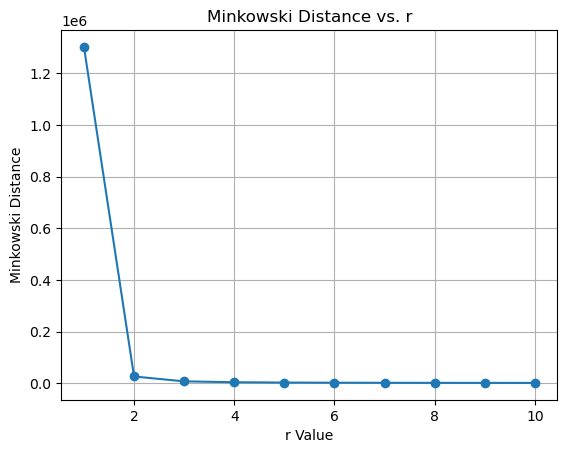

In [15]:
import matplotlib.pyplot as plt
feature_vector1 = df['contrast_0']
feature_vector2 = df['ASM_0']
r_values = range(1, 11)
minkowski_distances = []
for r in r_values:
    distance=ny.power(ny.sum(ny.power(ny.abs(feature_vector1 - feature_vector2), r)), 1/r)
    minkowski_distances.append(distance)
plt.plot(r_values, minkowski_distances, marker='o')
plt.xlabel('r Value')
plt.ylabel('Minkowski Distance')
plt.title('Minkowski Distance vs. r')
plt.grid(True)
plt.show()

In [17]:
from sklearn.model_selection import train_test_split
X =df.iloc[:,0:26]
y =df.iloc[:,[24]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:
pip install --upgrade scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [18]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train.values.ravel())

KNeighborsClassifier(n_neighbors=3)

In [25]:
pip install --upgrade numpy scikit-learn

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for numpy from https://files.pythonhosted.org/packages/72/b2/02770e60c4e2f7e158d923ab0dea4e9f146a2dbf267fec6d8dc61d475689/numpy-1.25.2-cp311-cp311-win_amd64.whl.metadata
  Using cached numpy-1.25.2-cp311-cp311-win_amd64.whl.metadata (5.7 kB)
Using cached numpy-1.25.2-cp311-cp311-win_amd64.whl (15.5 MB)
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.0 requires FuzzyTM>=0.4.0, which is not installed.
tables 3.8.0 requires blosc2~=2.0.0, which is not installed.
tables 3.8.0 requires cython>=0.29.21, which is not installed.
transformers 2.1.1 requires sentencepiece, which is not installed.
numba 0.57.0 requires numpy<1.25,>=1.21, but you have numpy 1.25.2 which is incompatible.


In [44]:
accuracy = neigh.score(X_test, y_test)
print(f"Accuracy = ",accuracy)

AttributeError: 'Flags' object has no attribute 'c_contiguous'

In [38]:
accuracy = knn.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.8


In [45]:
predicted_labels = neigh.predict(X_test)
print(predicted_labels)

AttributeError: 'Flags' object has no attribute 'c_contiguous'

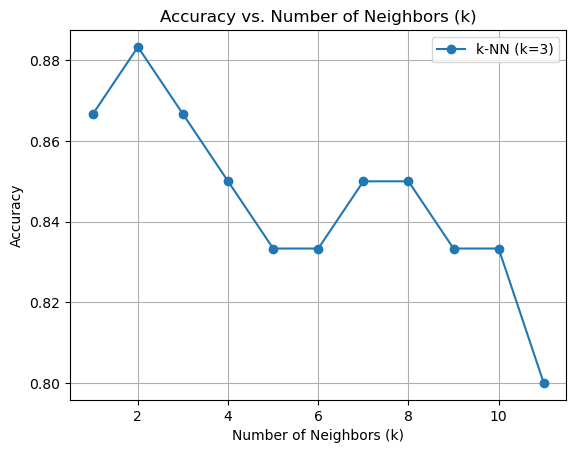

In [39]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

X, y = make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
k_values = list(range(1, 12))
accuracy_values_knn = []


for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    accuracy = knn.score(X_test, y_test)
    accuracy_values_knn.append(accuracy)
plt.plot(k_values, accuracy_values_knn, marker='o', label='k-NN (k=3)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Neighbors (k)')
plt.legend()
plt.grid(True)
plt.show()